In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

In [5]:
df_ndvi = pd.read_csv("ndvi.csv")
df_savi = pd.read_csv("savi.csv")
df_ndre = pd.read_csv("ndre.csv")

In [6]:
df_ndvi.head()

,system:time_start,ndvi
0,"Dec 16, 2018",0.629
1,"Dec 21, 2018",0.369
2,"Dec 31, 2018",0.473
3,"Jan 5, 2019",0.352
4,"Jan 25, 2019",0.500


In [7]:
df_ndvi.rename(columns={"system:time_start": "Date"}, inplace=True)
df_savi.rename(columns={"system:time_start": "Date"}, inplace=True)
df_ndre.rename(columns={"system:time_start": "Date"}, inplace=True)

In [8]:
df_ndvi.head()

,Date,ndvi
0,"Dec 16, 2018",0.629
1,"Dec 21, 2018",0.369
2,"Dec 31, 2018",0.473
3,"Jan 5, 2019",0.352
4,"Jan 25, 2019",0.500


In [9]:
df_ndvi['Date'] = pd.to_datetime(df_ndvi['Date'])
df_savi['Date'] = pd.to_datetime(df_savi['Date'])
df_ndre['Date'] = pd.to_datetime(df_ndre['Date'])

In [10]:
df_ndvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    124 non-null    datetime64[ns]
 1   ndvi    124 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


In [11]:
df_ndvi.head()

,Date,ndvi
0,2018-12-16,0.629
1,2018-12-21,0.369
2,2018-12-31,0.473
3,2019-01-05,0.352
4,2019-01-25,0.500


In [12]:
#df_ndvi.set_index('Date', inplace=True)
#df_savi.set_index('Date', inplace=True)
#df_ndre.set_index('Date', inplace=True)
df_ndvi.set_index('Date', inplace=True)

In [13]:
ndvi_weekly = df_ndvi.groupby(pd.Grouper(freq='1W'))

<AxesSubplot: xlabel='Date'>

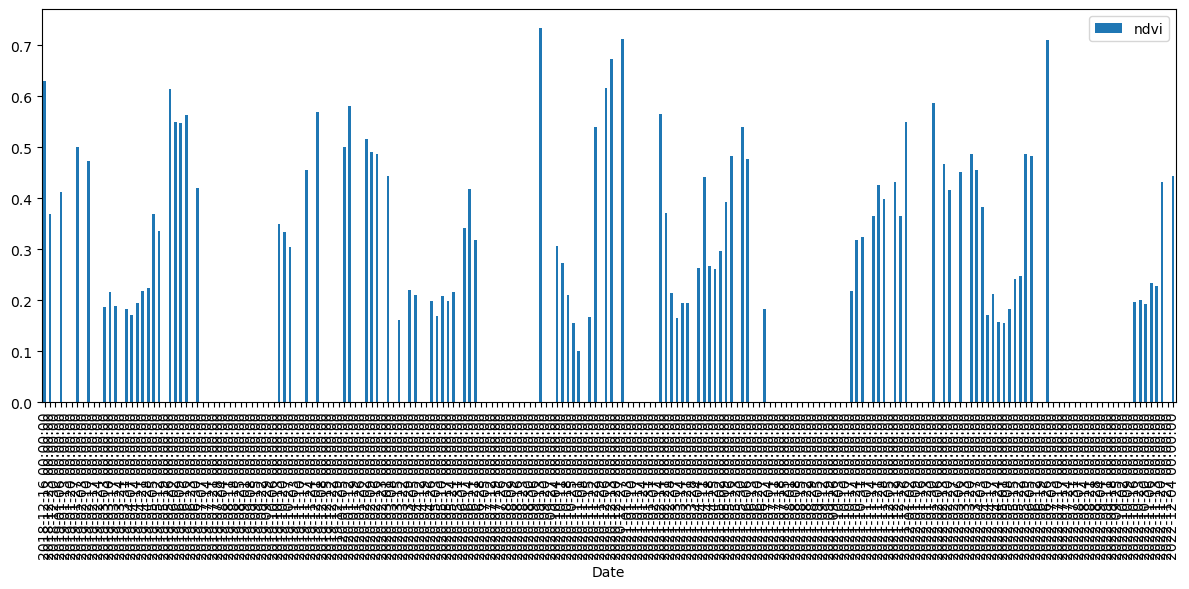

In [14]:
ndvi_weekly.mean().plot(kind='bar')

In [17]:
df_savi.set_index('Date', inplace=True)
df_ndre.set_index('Date', inplace=True)

In [18]:
savi_weekly = df_savi.groupby(pd.Grouper(freq="1W"))
ndre_weekly = df_ndre.groupby(pd.Grouper(freq='1W'))

<AxesSubplot: xlabel='Date'>

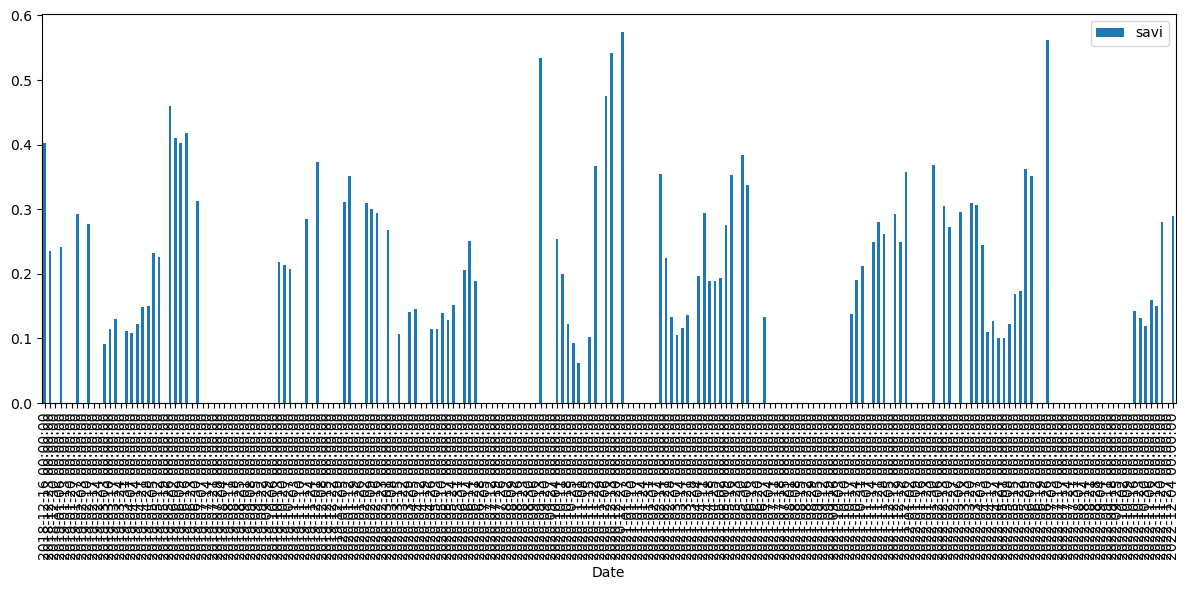

In [19]:
savi_weekly.mean().plot(kind='bar')

<AxesSubplot: xlabel='Date'>

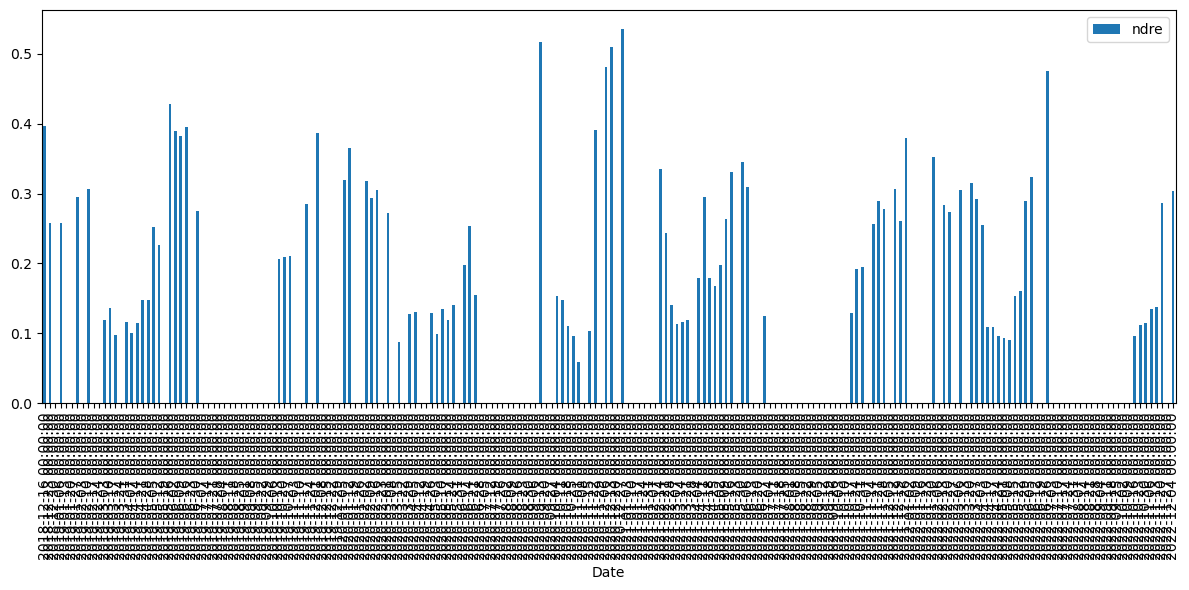

In [20]:
ndre_weekly.mean().plot(kind='bar')

In [21]:
ndvi_weekly.mean().to_csv('NDVI_final.csv')

In [22]:
savi_weekly.mean().to_csv('SAVI_final.csv')

In [23]:
ndre_weekly.mean().to_csv('NDRE_final.csv')